# CME538 - Introduction to Data Science
## Lecture 6.1 - Loss Functions

## Setup Notebook

In [1]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Import Tips Data
Let's import out tips dataset from `Seaborn`.

In [2]:
tips = sns.load_dataset('tips')
tips = tips.iloc[0:-1]
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Add a column representing the tip percentage.

In [3]:
tips['tip_pct'] = tips['tip'] / tips['total_bill'] * 100
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


Now, let's plot `'tip_pct'` using a `Rugplot`.

Text(0.5, 0, 'Tipe Percentage')

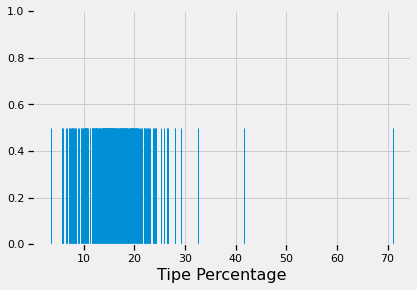

In [4]:
sns.rugplot(tips['tip_pct'], height=0.5);
plt.ylim([0, 1])
plt.xlabel('Tipe Percentage', fontsize=16)

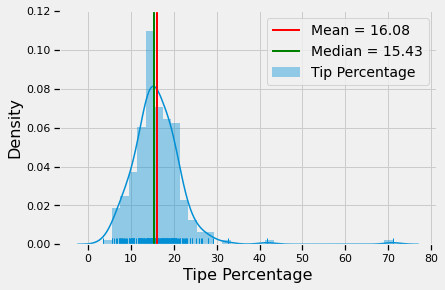

In [5]:
sns.distplot(tips['tip_pct'], rug=True, label='Tip Percentage')
plt.plot([np.mean(tips['tip_pct']), np.mean(tips['tip_pct'])], [0, 0.12], 
         '-r', lw=2, label='Mean = {}'.format(np.round(np.mean(tips['tip_pct']), 2)))
plt.plot([np.median(tips['tip_pct']), np.median(tips['tip_pct'])], [0, 0.12], 
         '-g', lw=2, label='Median = {}'.format(np.round(np.median(tips['tip_pct']), 2)))
plt.legend(fontsize=14)
plt.xlabel('Tipe Percentage', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.ylim([0, 0.12]);

Text(0.5, 0, 'Tipe Percentage')

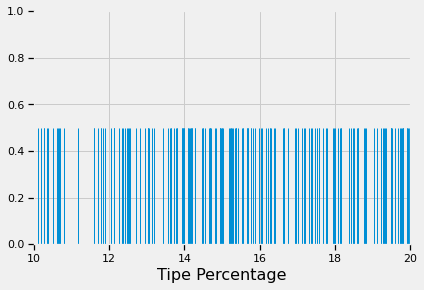

In [6]:
sns.rugplot(tips['tip_pct'], height=0.5);
plt.xlim([10, 20])
plt.ylim([0, 1])
plt.xlabel('Tipe Percentage', fontsize=16)

# Absolute Loss

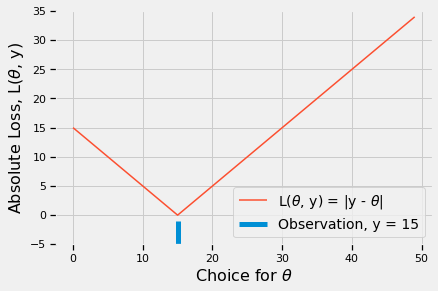

In [7]:
observation = 15
thetas = range(50)

absolute_loss = [np.abs(observation - theta) for theta in thetas]

sns.rugplot([observation], height=0.1, lw=5, label='Observation, y = 15')
plt.plot(thetas, absolute_loss, '-', label='L($\\theta$, y) = |y - $\\theta$|')
plt.legend(loc=4, fontsize=14)
plt.ylim([-5, 35])
plt.xlabel('Choice for $\\theta$', fontsize=16)
plt.ylabel('Absolute Loss, L($\\theta$, y)', fontsize=16);

# Squared Loss

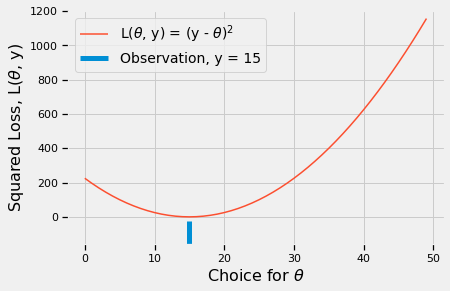

In [8]:
observation = 15
thetas = range(50)

squared_loss = [(observation - theta)**2 for theta in thetas]

sns.rugplot([observation], height=0.1, lw=5, label='Observation, y = 15')
plt.plot(thetas, squared_loss, '-', label='L($\\theta$, y) = (y - $\\theta$)$^2$')
plt.legend(loc=2, fontsize=14)
plt.ylim([-160, 1200])
plt.xlabel('Choice for $\\theta$', fontsize=16)
plt.ylabel('Squared Loss, L($\\theta$, y)', fontsize=16);

# Squared Loss vs Absolute Loss

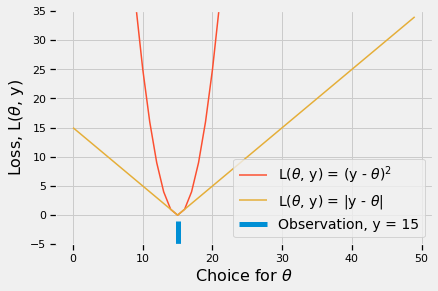

In [9]:
observation = 15
thetas = range(50)

absolute_loss = [np.abs(observation - theta) for theta in thetas]
squared_loss = [(observation - theta)**2 for theta in thetas]

sns.rugplot([observation], height=0.1, lw=5, label='Observation, y = 15')
plt.plot(thetas, squared_loss, '-', label='L($\\theta$, y) = (y - $\\theta$)$^2$')
plt.plot(thetas, absolute_loss, '-', label='L($\\theta$, y) = |y - $\\theta$|')
plt.legend(loc=4, fontsize=14)
plt.ylim([-5, 35])
plt.xlabel('Choice for $\\theta$', fontsize=16)
plt.ylabel('Loss, L($\\theta$, y)', fontsize=16);

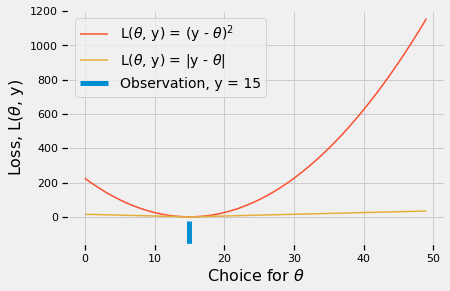

In [10]:
observation = 15
thetas = range(50)

absolute_loss = [np.abs(observation - theta) for theta in thetas]
squared_loss = [(observation - theta)**2 for theta in thetas]

sns.rugplot([observation], height=0.1, lw=5, label='Observation, y = 15')
plt.plot(thetas, squared_loss, '-', label='L($\\theta$, y) = (y - $\\theta$)$^2$')
plt.plot(thetas, absolute_loss, '-', label='L($\\theta$, y) = |y - $\\theta$|')
plt.legend(loc=2, fontsize=14)
plt.ylim([-160, 1200])
plt.xlabel('Choice for $\\theta$', fontsize=16)
plt.ylabel('Loss, L($\\theta$, y)', fontsize=16);

# Average Loss

In [11]:
def absolute_loss(y, theta):
    """
    Returns the absolute loss between 
    multiple observations and one theta value.
    """
    return np.mean(np.abs(y - theta))

def squared_loss(y, theta):
    """
    Returns the squared loss between 
    multiple observations and one theta value.
    """
    return np.mean((y - theta)**2)

def brute_force_optimize(loss_func, dataset, thetas):
    """
    Returns the value of theta in thetas that produces the least loss
    on a given dataset and the loss for all thetas.
    """
    # Calculate loss for each theta
    losses = [loss_func(theta, dataset) for theta in thetas]

    return {'optimum_theta': thetas[np.argmin(losses)], 
            'optimum_loss': np.min(losses), 
            'thetas': thetas, 
            'losses': losses}

## Average Absolute Loss

In [12]:
# Run optimization
absolute_loss_optimum = brute_force_optimize(
    loss_func=absolute_loss, 
    dataset=tips['tip_pct'].values, 
    thetas=np.arange(0, 100, 5)
)

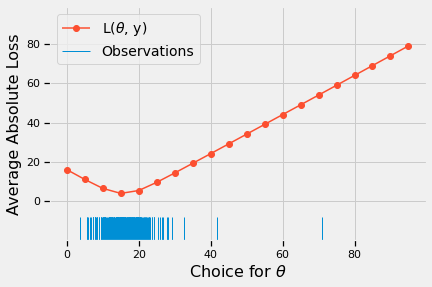

In [13]:
sns.rugplot(tips['tip_pct'].values, height=0.1, label='Observations')
plt.plot(absolute_loss_optimum['thetas'], 
         absolute_loss_optimum['losses'], 
         'o-', label='L($\\theta$, y)')
plt.legend(loc=2, fontsize=14)
plt.xlabel('Choice for $\\theta$', fontsize=16)
plt.ylabel('Average Absolute Loss', fontsize=16);

## Average Squared Loss

In [14]:
# Run optimization
squared_loss_optimum = brute_force_optimize(
    loss_func=squared_loss, 
    dataset=tips['tip_pct'].values, 
    thetas=np.arange(0, 100, 5)
)

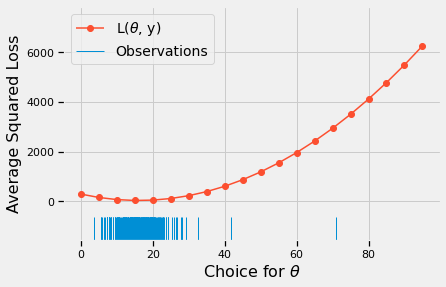

In [15]:
sns.rugplot(tips['tip_pct'].values, height=0.1, label='Observations')
plt.plot(squared_loss_optimum['thetas'], 
         squared_loss_optimum['losses'], 
         'o-', label='L($\\theta$, y)')
plt.legend(loc=2, fontsize=14)
plt.xlabel('Choice for $\\theta$', fontsize=16)
plt.ylabel('Average Squared Loss', fontsize=16);

# Brute Force Optimization

In [16]:
# Run optimization
absolute_loss_optimum = brute_force_optimize(
    loss_func=absolute_loss, 
    dataset=tips['tip_pct'].values, 
    thetas=np.arange(0, 100, 0.01)
)

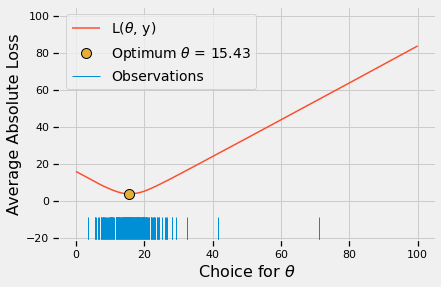

In [17]:
sns.rugplot(tips['tip_pct'].values, height=0.1, label='Observations')
plt.plot(absolute_loss_optimum['thetas'], 
         absolute_loss_optimum['losses'], 
         '-', label='L($\\theta$, y)')
plt.plot(absolute_loss_optimum['optimum_theta'], 
         absolute_loss_optimum['optimum_loss'], 
         'o', markeredgecolor='k', ms=10, 
         label='Optimum $\\theta$ = {:.2f}'.format(absolute_loss_optimum['optimum_theta']))
plt.legend(loc=2, fontsize=14)
plt.xlabel('Choice for $\\theta$', fontsize=16)
plt.ylabel('Average Absolute Loss', fontsize=16);

In [18]:
# Run optimization
squared_loss_optimum = brute_force_optimize(
    loss_func=squared_loss, 
    dataset=tips['tip_pct'].values, 
    thetas=np.arange(0, 100, 0.01)
)

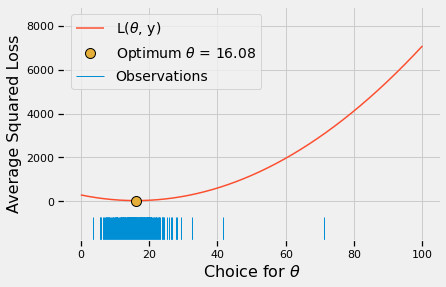

In [19]:
sns.rugplot(tips['tip_pct'].values, height=0.1, label='Observations')
plt.plot(squared_loss_optimum['thetas'], 
         squared_loss_optimum['losses'], 
         '-', label='L($\\theta$, y)')
plt.plot(squared_loss_optimum['optimum_theta'], 
         squared_loss_optimum['optimum_loss'], 
         'o', markeredgecolor='k', ms=10, 
         label='Optimum $\\theta$ = {:.2f}'.format(squared_loss_optimum['optimum_theta']))
plt.legend(loc=2, fontsize=14)
plt.xlabel('Choice for $\\theta$', fontsize=16)
plt.ylabel('Average Squared Loss', fontsize=16);

In [20]:
mean = np.mean(tips['tip_pct'].values)
print('The mean tip percentage is {:.2f} %.'.format(mean))

The mean tip percentage is 16.08 %.


In [21]:
median = np.median(tips['tip_pct'].values)
print('The median tip percentage is {:.2f} %.'.format(median))

The median tip percentage is 15.43 %.


## Different Ranges

In [22]:
# Run optimization
squared_loss_optimum = brute_force_optimize(
    loss_func=squared_loss, 
    dataset=tips['tip_pct'].values, 
    thetas=np.arange(0, 100, 10)
)

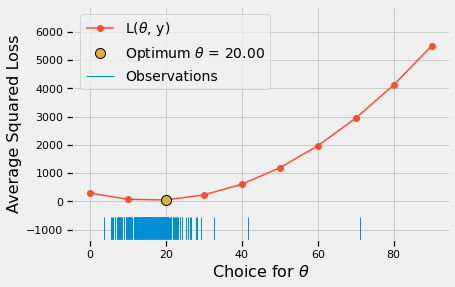

In [23]:
sns.rugplot(tips['tip_pct'].values, height=0.1, label='Observations')
plt.plot(squared_loss_optimum['thetas'], 
         squared_loss_optimum['losses'], 
         'o-', label='L($\\theta$, y)')
plt.plot(squared_loss_optimum['optimum_theta'], 
         squared_loss_optimum['optimum_loss'], 
         'o', markeredgecolor='k', ms=10, 
         label='Optimum $\\theta$ = {:.2f}'.format(squared_loss_optimum['optimum_theta']))
plt.legend(loc=2, fontsize=14)
plt.xlabel('Choice for $\\theta$', fontsize=16)
plt.ylabel('Average Squared Loss', fontsize=16);